In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_excel('../data/raw/QS by Subjects 2014-2021.xlsx',
                   sheet_name='Engineering & Technology (Facul')


In [3]:
df.shape


(2532, 15)

In [4]:
df.isna().sum()


Year                  0
Faculty               0
Subject               0
Rank                  0
Institution           0
Location              0
Academic Score       85
Employer Score       89
Citations Score      77
H Score              78
Score               526
Rank TB            1024
Score_Calc         1024
RankInt            2473
QS Region          2028
dtype: int64

Empezamos eliminando los NaNs

In [5]:
df['Academic Score'] = df['Academic Score'].fillna(df['Academic Score'].mean())
df['Employer Score'] = df['Employer Score'].fillna(df['Employer Score'].mean())
df['Citations Score'] = df['Citations Score'].fillna(
    df['Citations Score'].mean())
df['H Score'] = df['H Score'].fillna(df['H Score'].mean())
df['Score'] = df['Score'].fillna(df['Score'].mean())
df = df.drop(columns=['Rank TB', 'Score_Calc', 'RankInt', 'QS Region'])


In [6]:
df.isna().sum()


Year               0
Faculty            0
Subject            0
Rank               0
Institution        0
Location           0
Academic Score     0
Employer Score     0
Citations Score    0
H Score            0
Score              0
dtype: int64

Con todos estos datos haremos un modelo usando los scores para predecir el rank, primeramente necesitamos ver que vairbles estan muy correlacionadas

Tenemos un problema debido a que Rank esta mal formateado, asi que usaremos Score como variable a predecir

In [7]:
df.corr()['Score'].sort_values()


Year              -0.026407
Citations Score    0.352722
H Score            0.560210
Employer Score     0.660981
Academic Score     0.805995
Score              1.000000
Name: Score, dtype: float64

En este [articulo](https://www.sciencedirect.com/science/article/pii/S0895435615000141) se menciona que solo son necesarias dos variables para la mayoria de modelos de regresion lineal, asi que solo usare Academic y Employer Score

## Regresion lineal

In [8]:
cols = ['Academic Score', 'Employer Score', 'Citations Score', 'H Score']


In [9]:
X = df[cols]
y = df['Score']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


In [11]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
predictions = modelo_lineal.predict(X_test)
print('train score', modelo_lineal.score(X_train, y_train))
print('test score', modelo_lineal.score(X_test, y_test))


train score 0.7516292649612546
test score 0.7318296499391053


## Random Forest

In [12]:
cols = ['Academic Score', 'Employer Score', 'Citations Score', 'H Score']


In [13]:
X = df[cols]
y = df['Score']


In [14]:
modelo_forest = RandomForestRegressor(
    max_depth=10, max_leaf_nodes=750, random_state=0)
modelo_forest.fit(X_train, y_train)
predictions = modelo_forest.predict(X_test)
print('train score', modelo_forest.score(X_train, y_train))
print('test score', modelo_forest.score(X_test, y_test))


train score 0.9307376874048509
test score 0.8534605710420222


In [15]:
df_tec = df[df['Institution'] == 'Tecnológico de Monterrey (ITESM)']


In [16]:
df_tec = df_tec.replace('267=', 267)
df_tec = df_tec.replace('156=', 156)
df_tec = df_tec.replace('145=', 145)
df_tec = df_tec.replace('129=', 129)
df_tec['Rank'] = pd.to_numeric(df_tec['Rank'])


<AxesSubplot:xlabel='Year', ylabel='Score'>

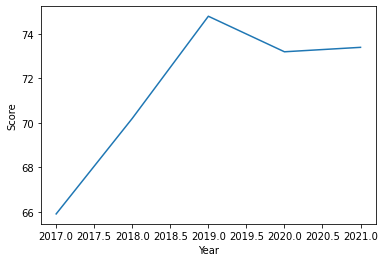

In [17]:
sns.lineplot(x='Year', y='Score', data=df_tec)


In [18]:
nuevo = [2022, "Engineering & Technology", "Engineering & Technology (Faculty)", 0, 'Tec', 'Mexico', np.nan, np.nan, np.nan,
         np.nan, 0]
nuevo = pd.Series(nuevo, index=df_tec.columns)


In [19]:
df_tec = df_tec.append(nuevo, ignore_index=True)
df_tec


/var/folders/d_/jdkfxb9j7s5d540rn875nn2h0000gn/T/ipykernel_17225/1893646304.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tec = df_tec.append(nuevo, ignore_index=True)


,Year,Faculty,Subject,Rank,Institution,Location,Academic Score,Employer Score,Citations Score,H Score,Score
0,2017,Engineering & Technology,Engineering & Technology (Faculty),267,Tecnológico de Monterrey (ITESM),Mexico,73.8,64.2,57.8,56.2,65.9
1,2018,Engineering & Technology,Engineering & Technology (Faculty),235,Tecnológico de Monterrey (ITESM),Mexico,77.8,70.8,60.7,57.9,70.2
2,2019,Engineering & Technology,Engineering & Technology (Faculty),156,Tecnológico de Monterrey (ITESM),Mexico,77.8,79.5,68.6,63.5,74.8
3,2020,Engineering & Technology,Engineering & Technology (Faculty),145,Tecnológico de Monterrey (ITESM),Mexico,75.6,82.4,68.6,52.9,73.2
4,2021,Engineering & Technology,Engineering & Technology (Faculty),129,Tecnológico de Monterrey (ITESM),Mexico,75.2,83.2,72.0,50.2,73.4
5,2022,Engineering & Technology,Engineering & Technology (Faculty),0,Tec,Mexico,NaN,NaN,NaN,NaN,0.0


In [20]:
x_tec = df_tec[cols]
x_tec['Year'] = df_tec['Year']
x_tec['Year'] = pd.to_datetime(x_tec['Year'], format='%Y')


/var/folders/d_/jdkfxb9j7s5d540rn875nn2h0000gn/T/ipykernel_17225/1159328487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_tec['Year'] = df_tec['Year']
/var/folders/d_/jdkfxb9j7s5d540rn875nn2h0000gn/T/ipykernel_17225/1159328487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_tec['Year'] = pd.to_datetime(x_tec['Year'], format='%Y')


In [21]:
x_tec = x_tec.set_index('Year')
x_tec
#x_tec['Year'] = pd.to_datetime(x_tec['Year'],format='%Y')


,Academic Score,Employer Score,Citations Score,H Score
Year,,,,
2017-01-01,73.8,64.2,57.8,56.2
2018-01-01,77.8,70.8,60.7,57.9
2019-01-01,77.8,79.5,68.6,63.5
2020-01-01,75.6,82.4,68.6,52.9
2021-01-01,75.2,83.2,72.0,50.2
2022-01-01,NaN,NaN,NaN,NaN


In [22]:
x_tec = x_tec.interpolate(method='time')
x_tec


,Academic Score,Employer Score,Citations Score,H Score
Year,,,,
2017-01-01,73.8,64.2,57.8,56.2
2018-01-01,77.8,70.8,60.7,57.9
2019-01-01,77.8,79.5,68.6,63.5
2020-01-01,75.6,82.4,68.6,52.9
2021-01-01,75.2,83.2,72.0,50.2
2022-01-01,75.2,83.2,72.0,50.2


In [23]:
print(modelo_lineal.predict(x_tec))
print(modelo_forest.predict(x_tec))


[69.95352532 72.95950974 75.97335457 74.1381271  73.81743811 73.81743811]
[67.40230919 71.1324406  76.1221755  72.96401242 73.34809338 73.34809338]


In [24]:
df_2021 = df[df['Year'] == 2021]
score_predecido = modelo_forest.predict(x_tec)[-1]
print(score_predecido)
df_2021[df_2021['Score'] <= score_predecido +
        0.1].sort_values(by='Score', ascending=0).head(10)


73.34809337606835


,Year,Faculty,Subject,Rank,Institution,Location,Academic Score,Employer Score,Citations Score,H Score,Score
2012,2021,Engineering & Technology,Engineering & Technology (Faculty),129=,Tecnológico de Monterrey (ITESM),Mexico,75.2,83.2,72.0,50.2,73.4
2141,2021,Engineering & Technology,Engineering & Technology (Faculty),129=,Technische Universität Dresden,Germany,79.2,59.6,83.3,75.7,73.4
2142,2021,Engineering & Technology,Engineering & Technology (Faculty),129=,University of Leeds,United Kingdom,70.7,70.2,87.0,73.5,73.4
2143,2021,Engineering & Technology,Engineering & Technology (Faculty),132,Beijing Institute of Technology,China,72.9,62.9,81.3,87.2,73.3
2144,2021,Engineering & Technology,Engineering & Technology (Faculty),133,Ohio State University,United States,71.3,66.5,86.2,78.4,73.2
2145,2021,Engineering & Technology,Engineering & Technology (Faculty),134=,The University of Adelaide,Australia,67.6,65.6,96.1,79.6,73.1
2146,2021,Engineering & Technology,Engineering & Technology (Faculty),134=,Universidade Estadual de Campinas (Unicamp),Brazil,74.3,72.3,79.1,65.7,73.1
2147,2021,Engineering & Technology,Engineering & Technology (Faculty),136,University of Twente,Netherlands,75.2,67.2,83.4,68.5,73.0
2148,2021,Engineering & Technology,Engineering & Technology (Faculty),137=,The University of Nottingham,United Kingdom,69.7,66.4,87.0,79.6,72.8
2149,2021,Engineering & Technology,Engineering & Technology (Faculty),137=,"University of California, Davis (UCD)",United States,70.4,66.1,87.1,78.4,72.8


Tomando solo su desempeño en **ingenieria** el tec podria bajar al lugar 130 